# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.424625e+01     1.372050e+01
 * time: 0.0037238597869873047
     1     6.414000e+01     1.192982e+01
 * time: 0.010737895965576172
     2     5.646664e+01     1.601406e+01
 * time: 0.025374889373779297
     3     4.121458e+01     1.106804e+01
 * time: 0.11724400520324707
     4     2.953722e+01     8.182023e+00
 * time: 0.13741493225097656
     5     2.177231e+01     6.069720e+00
 * time: 0.15445995330810547
     6     1.668592e+01     5.257063e+00
 * time: 0.1684579849243164
     7     1.555717e+01     5.486609e+00
 * time: 0.17988991737365723
     8     1.014789e+01     5.144508e+00
 * time: 0.19387483596801758
     9     7.766536e+00     4.823594e+00
 * time: 0.2074599266052246
    10     7.064476e+00     2.508619e+00
 * time: 0.22132492065429688
    11     6.696921e+00     2.949516e+00
 * time: 0.27318596839904785
    12     6.444739e+00     2.639571e+00
 * time: 0.28644585609436035
    13     6.285560e+00     1.928285e+00
 * tim

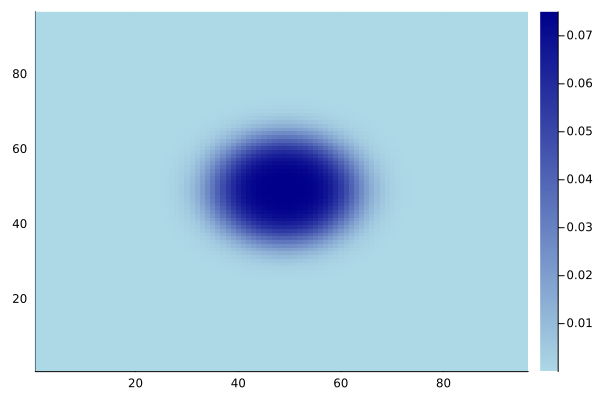

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)